<a href="https://colab.research.google.com/github/drwpls/cuda/blob/deviceSeamCarvingOptimized/Final/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nhóm sinh viên:
1. Phan Lộc Sơn - 19120033
2. Nguyễn Xuân Vỵ - 19120732
3. Võ Song Nguyên - 

# Final: Song song hoá Seam carving

GET GPU's capability:

In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


In [2]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
import numpy as np
def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

clone code from github:

In [3]:
%cd /content
!rm -rf cuda
!git clone -b deviceSeamCarvingOptimized https://github.com/drwpls/cuda.git

/content
Cloning into 'cuda'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 234 (delta 33), reused 41 (delta 17), pack-reused 162
Receiving objects: 100% (234/234), 2.29 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (103/103), done.


Change working directory into Final folder:

In [4]:
%cd ./cuda/Final

/content/cuda/Final


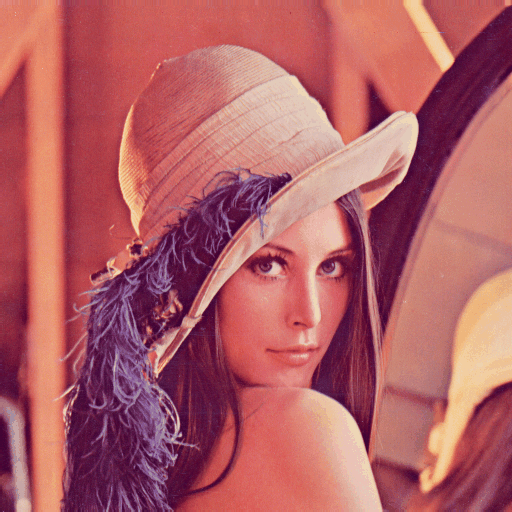

In [5]:
show_pnm('./images/lena.pnm')

Verify current working directory:

In [6]:
out_dir = get_ipython().getoutput('pwd')
assert out_dir[0] == '/content/cuda/Final'
out_dir[0]

'/content/cuda/Final'

In [7]:
!ls

deviceSeamCarving.cu  hostSeamCarving.cu  images  main.ipynb


In [8]:
!nvcc -arch=sm_75 hostSeamCarving.cu -o hostSeamCarving

In [9]:
!./hostSeamCarving ./images/lena.pnm out.pnm

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Image output size (width x height): 496 x 512


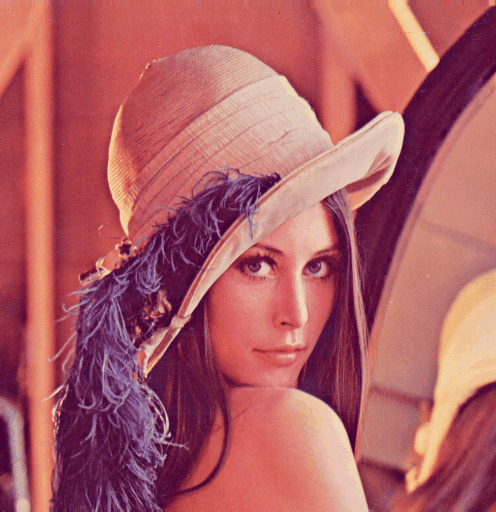

In [10]:
show_pnm('./out_host.pnm')


In [11]:
!nvcc -arch=sm_75 deviceSeamCarving.cu -o deviceSeamCarving

In [12]:
!./deviceSeamCarving ./images/lena.pnm out.pnm

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Seam Carving by host
Time: 3739.734 ms

Seam Carving by device
Time: 1002.421 ms
Error: 0.000000

Image output size (width x height): 462 x 512

Image output size (width x height): 462 x 512


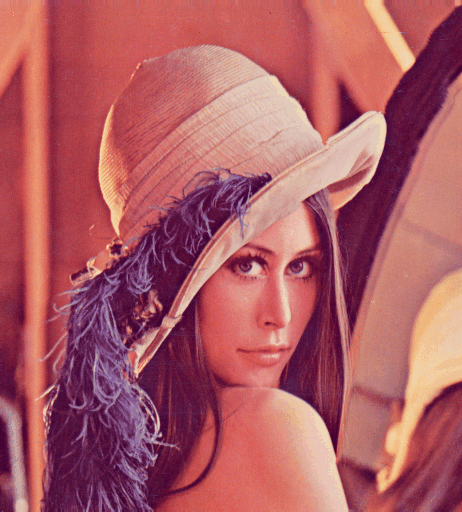

In [13]:
show_pnm('./out_device1.pnm')

In [48]:
!nvcc -arch=sm_75 deviceSeamCarvingOptimizeMem.cu -o deviceSeamCarvingOptimizeMem

In [52]:
!./deviceSeamCarvingOptimizeMem ./images/lena.pnm out.pnm

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Seam Carving by host
Time: 3678.921 ms

Seam Carving by device
Time: 1048.639 ms
Error: 0.000000

Seam Carving by device
Time: 879.890 ms
Error: 0.000000

Image output size (width x height): 462 x 512

Image output size (width x height): 462 x 512

Image output size (width x height): 462 x 512


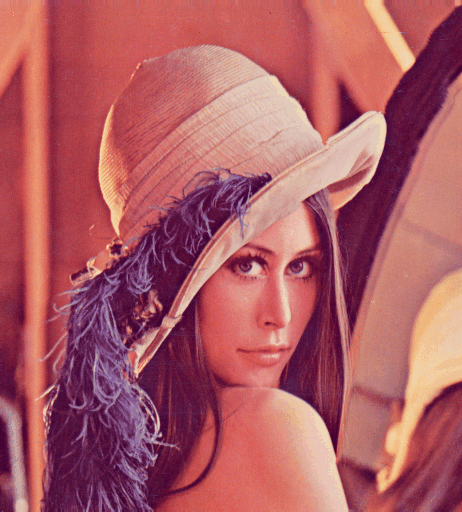

In [53]:
show_pnm('./out_device1.pnm')

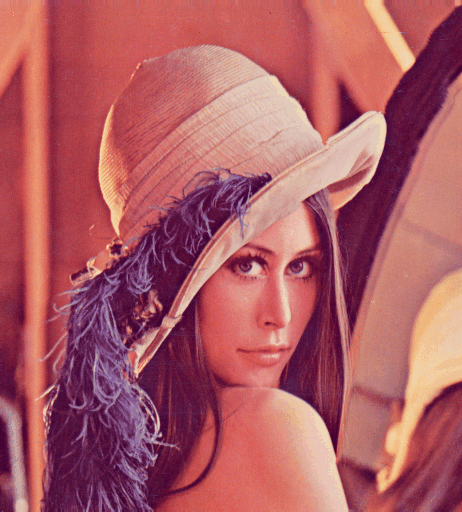

In [54]:
show_pnm('./out_device2.pnm')